In [1]:
import pandas as pd

In [2]:
iris=pd.read_csv(r"D:\Downloads Chrome\iris.csv")

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## As we can see there are no missing values so no need of preprocessing

In [4]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

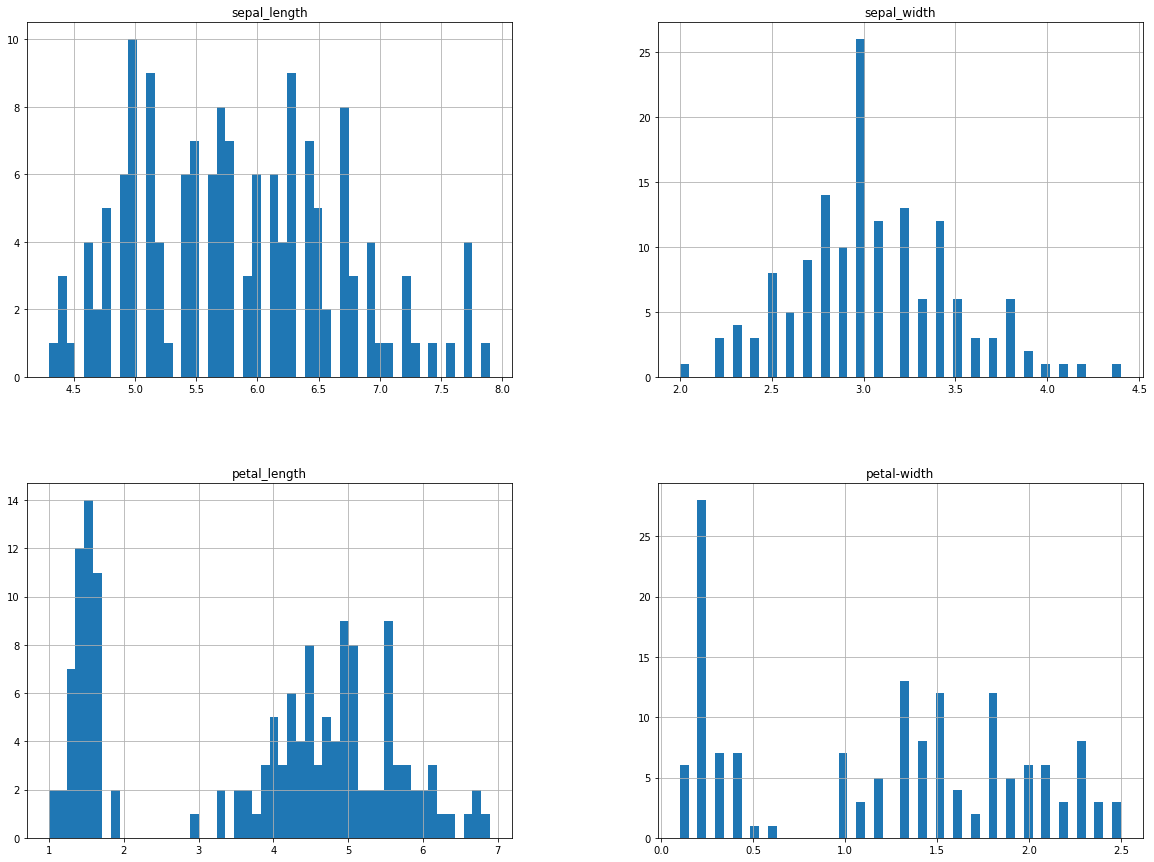

In [5]:
iris.hist(bins=50,figsize=(20,15))

In [6]:
import seaborn as sns

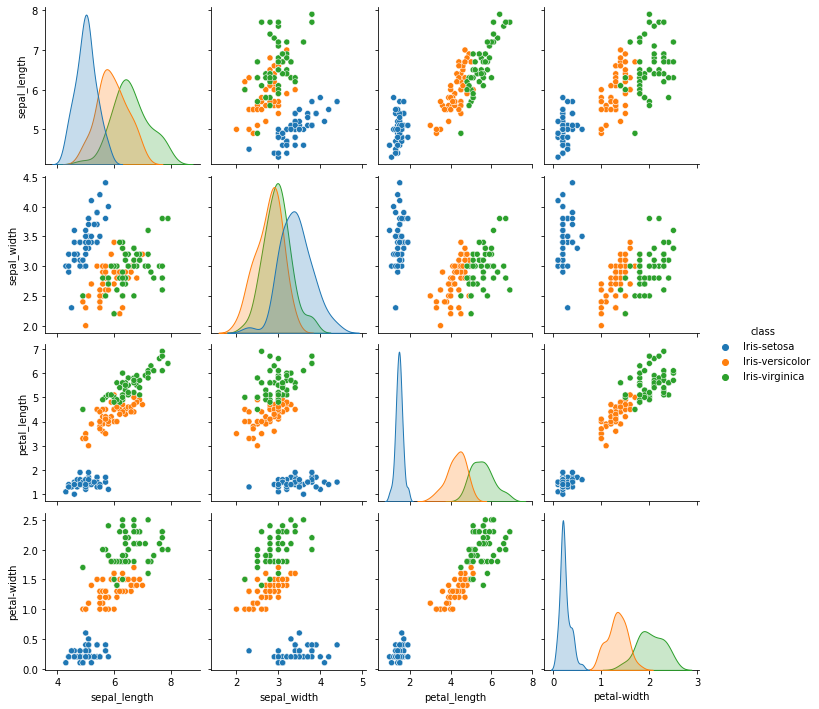

In [7]:
sns.pairplot(iris,hue='class')

In [8]:
y=iris['class']
x=iris.drop('class',axis=1)

In [9]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [10]:
x

,sepal_length,sepal_width,petal_length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

## Building the model

In [12]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=100)


clf.fit(X_train,y_train)

y_pred=clf.predict(X_val)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [13]:
from sklearn import metrics
metrics.accuracy_score(y_val,y_pred)

1.0

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [15]:
X_val

,sepal_length,sepal_width,petal_length,petal-width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


## Passing Random Values and predicting the species

In [16]:
df=pd.DataFrame({"sepal_length":[5.1],"sepal-width":[6.3],"petal_length":[7.9],"petal_width":[8.8]})
clf.predict(df)

array(['Iris-virginica'], dtype=object)